# Image processing

Again we follow a [tutorial](https://likegeeks.com/python-image-processing/)

Mathematical image processing is a rather new field but is of utmost importance due to its applicability within many disciplines such as medicine and social networks. Many algorithms have been developed over the last few decades and we here illustrate how to load and manipulate images in python based on the package `OpenCV` quoting Wikipedia

> OpenCV (Open source computer vision) is a library of programming functions mainly aimed at real-time computer vision.[1] Originally developed by Intel, it was later > supported by Willow Garage then Itseez (which was later acquired by Intel[2]). The library is cross-platform and free for use under the open-source BSD license.
> OpenCV supports the deep learning frameworks TensorFlow, Torch/PyTorch and Caffe.[3] 

In [39]:
import cv2

Common tasks in image processing:

* Input/Output, displaying images
* Basic manipulations: cropping, flipping, rotating, …
* Image filtering: denoising, sharpening
* Image segmentation: labeling pixels corresponding to different objects
* Classification
* Feature extraction
* Registration
* …


## Opening and writing to image files

In [42]:
img = cv2.imread("face.png")

In [43]:
print(type(img))

<class 'numpy.ndarray'>


So it turn's out that our image is a `NumPy` array and we want to view the image now. This could be done with the `cv2.imshow('Original Image', img)` command but this occassionally is buggy outside of windows so we use `matplotlib` instead
cv2.waitKey(0)

In [44]:
import matplotlib.pyplot as plt

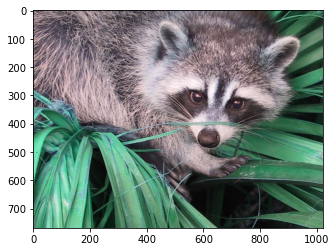

In [45]:
plt.imshow(img)
plt.show()

To rotate this image, you need the width and the height of the image because you will use them in the rotation process as you will see later.

In [48]:
height, width = img.shape[0:2]
print(img.shape[0:2])

(768, 1024)


Okay, now we have our image matrix and we want to get the rotation matrix. To get the rotation matrix, we use the `getRotationMatrix2D()` method of `cv2`. The syntax of `getRotationMatrix2D()` is:

Okay, now we have our image matrix and we want to get the rotation matrix. To get the rotation matrix, we use the `getRotationMatrix2D()` method of cv2. The syntax of `getRotationMatrix2D()` is:

`cv2.getRotationMatrix2D(center, angle, scale)`

Here the center is the center point of rotation, the angle is the angle in degrees and scale is the scale property which makes the image fit on the screen.

To get the rotation matrix of our image, the code will be:

In [57]:
rotationMatrix = cv2.getRotationMatrix2D((width/2, height/2), 190, 1.)
print(rotationMatrix)

[[-9.84807753e-01 -1.73648178e-01  1.08290247e+03]
 [ 1.73648178e-01 -9.84807753e-01  6.73258310e+02]]


The next step is to rotate our image with the help of the rotation matrix. To rotate the image, we have a cv2 method named warpAffine which takes the original image, the rotation matrix of the image and the width and height of the image as arguments.

To rotate the image, we have a cv2 method named wrapAffine which takes the original image, the rotation matrix of the image and the width and height of the image as arguments.

In [58]:
rotatedImage = cv2.warpAffine(img, rotationMatrix, (width, height))

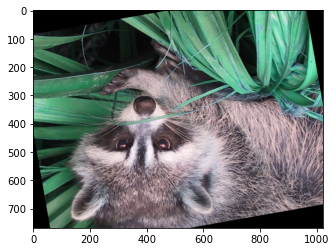

In [59]:
plt.imshow(rotatedImage)
plt.show()

## Crop an Image

First, we need to extract the width and height of the image:

In [61]:
height, width = img.shape[0:2]
print(img.shape[0:2])

(768, 1024)


Now get the starting and ending index of the row and column. This will define the size of the newly created image. For example, start from row number 10 till row number 15 will give the height of the image.

Similarly, start from column number 10 until column number 15 will give the width of the image.

You can get the starting point by specifying the percentage value of the total height and the total width. Similarly, to get the ending point of the cropped image, specify the percentage values as below:

In [62]:
startRow = int(height*.15)
 
startCol = int(width*.15)
 
endRow = int(height*.85)
 
endCol = int(width*.85)

In [63]:
croppedImage = img[startRow:endRow, startCol:endCol]

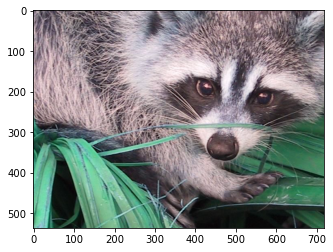

In [65]:
plt.imshow(croppedImage)
plt.show()

## Resize an Image

To resize an image, you can use the resize() method of openCV. In the resize method, you can either specify the values of x and y axis or the number of rows and columns which tells the size of the image.

Import and read the image:

In [72]:
resizeImg = cv2.resize(img, (0,0), fx=0.8, fy=0.8)

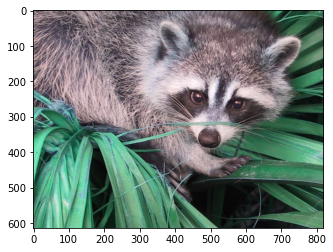

In [73]:
plt.imshow(resizeImg)
plt.show()

In [74]:
print(resizeImg.shape)

(614, 819, 3)


## Adjust Image Contrast

In Python OpenCV module, there is no particular function to adjust image contrast but the official documentation of OpenCV suggests an equation that can perform image brightness and image contrast both at the same time.

` new_img = a * original_img + b`

Here `a` is `alpha` which defines contrast of the image. If `a` is greater than 1, there will be higher contrast.

If the value of `a` is between 0 and 1 (smaller than 1 but greater than 0), there would be lower contrast. If `a` is 1, there will be no contrast effect on the image.

`b` stands for `beta`. The values of `b` vary from `-127 to +127`.

To implement this equation in Python OpenCV, you can use the `addWeighted()` method. We use The `addWeighted()` method as it generates the output in the range of 0 and 255 for a 24-bit color image.

The syntax of `addWeighted()` method is as follows:

`cv2.addWeighted(source_img1, alpha1, source_img2, alpha2, beta)`

This syntax will blend two images, the first source image (`source_img1`) with a weight of `alpha1` and second source image (`source_img2`).

If you only want to apply contrast in one image, you can add a second image source as zeros using `NumPy`.

Let’s work on a simple example. Import `NumPy` in addition to `cv2` :

In [75]:
import numpy as np

In [88]:
contrast_img = cv2.addWeighted(img, 2.0, np.zeros(img.shape, img.dtype), 0, 0)

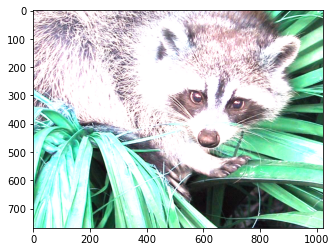

In [89]:
plt.imshow(contrast_img)
plt.show()

In [94]:
contrast_img = cv2.addWeighted(img, 2.5, img, 2.5,22)

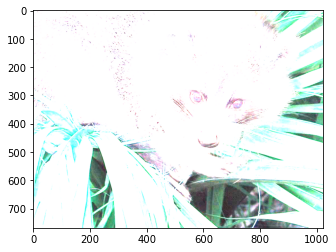

In [95]:
plt.imshow(contrast_img)
plt.show()

## Make an image blurry
## Gaussian Blur

To make an image blurry, you can use the `GaussianBlur()` method of OpenCV.

The `GaussianBlur()` uses the Gaussian kernel. The height and width of the kernel should be a positive and an odd number.

Then you have to specify the X and Y direction that is sigmaX and sigmaY respectively. If only one is specified, both are considered the same.

Illustration of Gaussian blur
![Gaussian blur](https://i.stack.imgur.com/bRN2c.jpg)

Consider the following example:

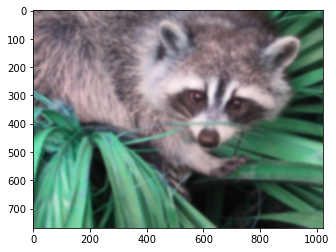

In [122]:
blur_image = cv2.GaussianBlur(img,(25,25),0)
plt.imshow(blur_image)
plt.show()

In [123]:
cv2.GaussianBlur?

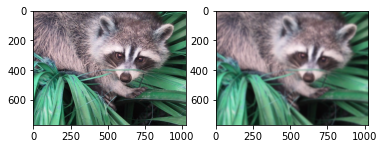

In [124]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(blur_image)

### Median Blur

In median blurring, the median of all the pixels of the image is calculated inside the kernel area. The central value is then replaced with the resultant median value. Median blurring is used when there are salt and pepper noise in the image.

To apply median blurring, you can use the `medianBlur()` method of OpenCV.

Consider the following example where we have a salt and pepper noise in the image:

In [129]:
blur_image_med = cv2.medianBlur(img,25)

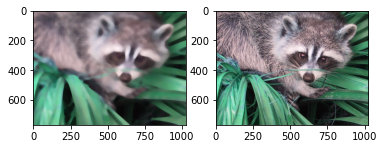

In [132]:
plt.subplot(121)
plt.imshow(blur_image_med)
plt.subplot(122)
plt.imshow(img)

## Edge Detection

Edge detection includes a variety of mathematical methods that aim at identifying points in a digital image at which the image brightness changes sharply or, more formally, has discontinuities. 

The points at which image brightness changes sharply are typically organized into a set of curved line segments that are usually named **edges**.

Edge detection is a fundamental tool in image processing, machine vision and computer vision, particularly in the areas of feature detection and feature extraction. 

To detect the edges in an image, you can use the `Canny()` method of cv2 which implements the **Canny edge detector**. The Canny edge detector is also known as the optimal detector. Canny works by applying a Gaussian blur and afterwards it applies differential operators in both directions.

The syntax to `Canny()` is as follows:

In [133]:
img = cv2.imread("peppers.png")
edge_img = cv2.Canny(img,100,200)

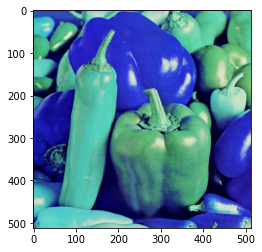

In [134]:
plt.imshow(img)

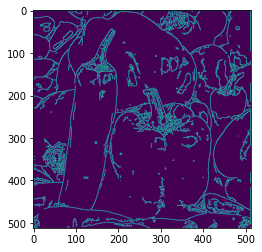

In [135]:
plt.imshow(edge_img)

## Reduce Noise

To reduce noise from an image, OpenCV provides the following methods:

* `fastNlMeansDenoising():` Removes noise from a grayscale image
* `fastNlMeansDenoisingColored():` Removes noise from a colored image
* `fastNlMeansDenoisingMulti():` Removes noise from grayscale image frames (a grayscale video)
* `fastNlMeansDenoisingColoredMulti():` Same as 3 but works with colored frames

Let’s use `fastNlMeansDenoisingColored()` in our example:

Import the `cv2` module and read the image:

In [136]:
den_img = cv2.fastNlMeansDenoisingColored(img,None,20,10,7,21)

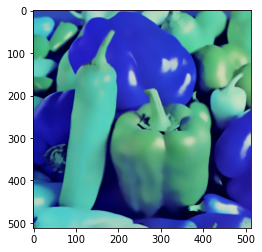

In [137]:
plt.imshow(den_img)

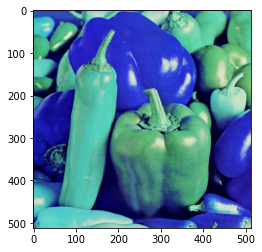

In [138]:
plt.imshow(img)

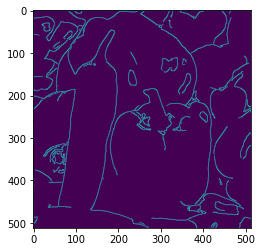

In [141]:
edge_img = cv2.Canny(den_img,100,200)
plt.imshow(edge_img)

**Conclusion**: Image processing is a highly mathematical discipline and very relevant in many applications.